In [316]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
data=pd.read_csv("tips (data for regression problem).csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [318]:
data.shape

(244, 7)

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [320]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [321]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [322]:
x=data.drop(columns=["tip"])
y=data.tip

# EDA

<Axes: xlabel='day', ylabel='tip'>

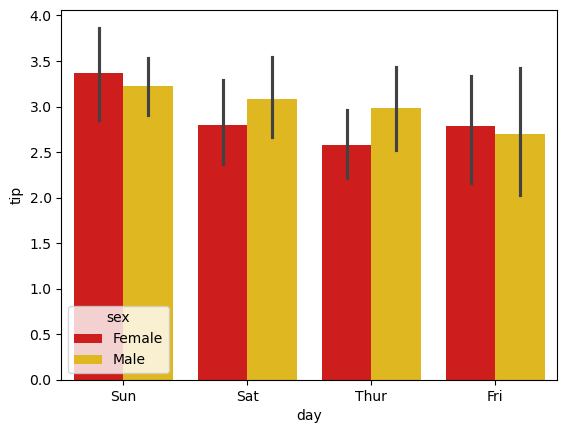

In [324]:
sns.barplot(data=data,x="day",y="tip",palette="hot",hue="sex")

<Axes: xlabel='day', ylabel='tip'>

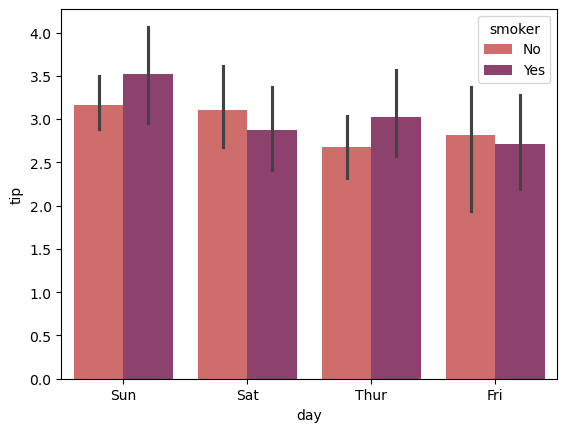

In [421]:
sns.barplot(data=data,x="day",y="tip",palette="flare",hue="smoker")

<Axes: xlabel='day', ylabel='tip'>

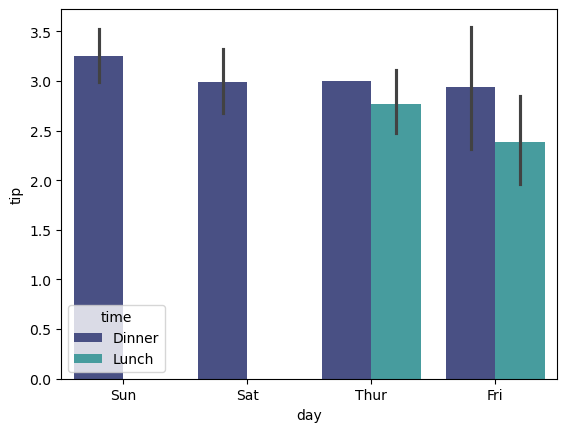

In [423]:
sns.barplot(data=data,x="day",y="tip",palette="mako",hue="time")

<Axes: xlabel='total_bill', ylabel='tip'>

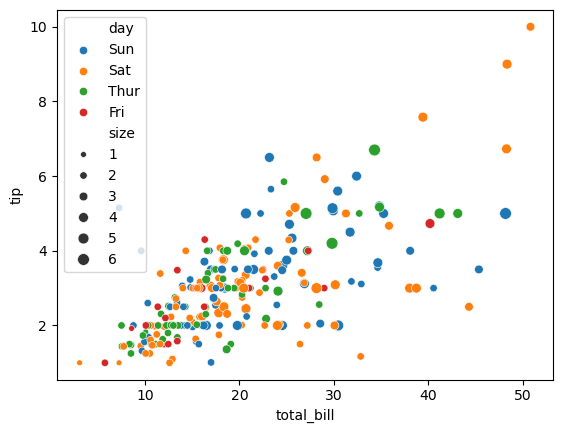

In [327]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="day",size="size")

<Axes: xlabel='sex', ylabel='tip'>

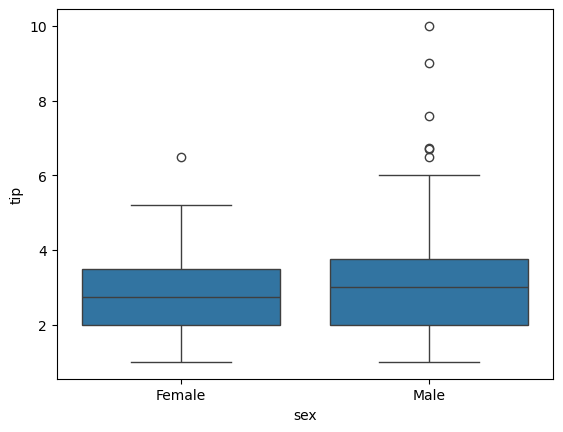

In [328]:
sns.boxplot(data=data,x="sex",y="tip")

<Axes: xlabel='day', ylabel='tip'>

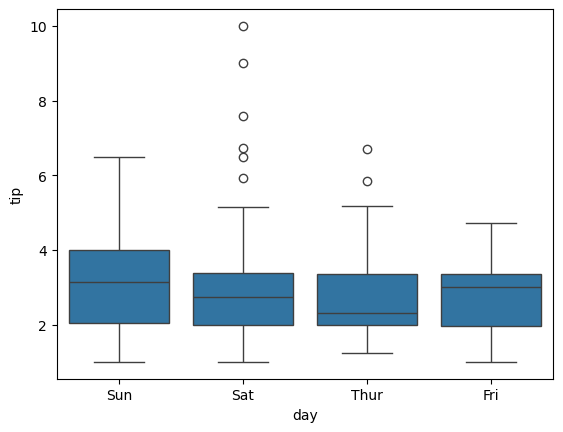

In [425]:
sns.boxplot(data=data,x="day",y="tip")

<Axes: xlabel='smoker', ylabel='tip'>

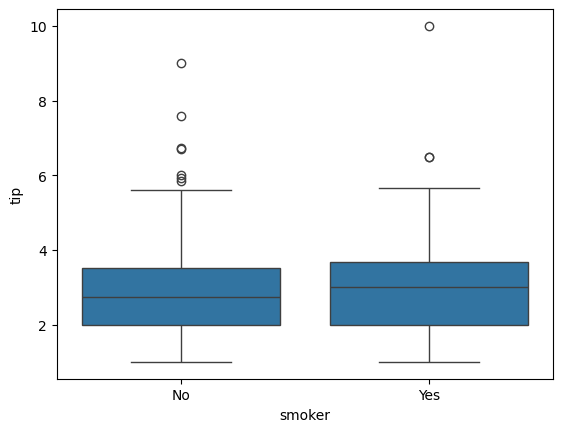

In [427]:
sns.boxplot(data=data,x="smoker",y="tip")

RESULT  
Tip varies with total bill and size  
Exceptional high tips are mainly paid by men.    
Weekend has more tips

In [429]:
# Train test split the data before preprocessing to avoid data leakage
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,random_state=7)

In [431]:
x["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [433]:
x["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [435]:
x["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [438]:
x_train = pd.get_dummies(x_train, columns=["sex","smoker","time"],drop_first=True)
x_valid = pd.get_dummies(x_valid, columns=["sex","smoker","time"],drop_first=True)

In [440]:
# Convert boolean columns generated due to above code in x_train and x_valid to integers
x_train = x_train.astype({col: 'int' for col in x_train.select_dtypes('bool').columns})
x_valid = x_valid.astype({col: 'int' for col in x_valid.select_dtypes('bool').columns})

In [442]:
x.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [444]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train["day"]=le.fit_transform(x_train["day"])
x_valid["day"] = le.transform(x_valid["day"])

In [446]:
x_train.head()

,total_bill,day,size,sex_Male,smoker_Yes,time_Lunch
66,16.45,1,2,0,0,0
208,24.27,1,2,1,1,0
193,15.48,3,2,1,1,1
77,27.20,3,4,1,0,1
96,27.28,0,2,1,1,0


model training:

### 1.Linear Regression

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(x_train, y_train)
ypred_linear = linear.predict(x_valid)
mse_linear = mean_squared_error(y_valid, ypred_linear)
r2_linear = r2_score(y_valid, ypred_linear)
print("mse for linear regression = ",mse_linear)
print("r2 for linear regression = ",r2_linear)

mse for linear regression =  0.8877758961150215
r2 for linear regression =  0.48253122496539935


### 2.Ridge Regularizarion

In [347]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_valid)
mse_ridge = mean_squared_error(y_valid, y_pred_ridge)
r2_ridge = r2_score(y_valid, y_pred_ridge)
print("mse for ridge = ",mse_ridge)
print("r2 for ridge = ",r2_ridge)

mse for ridge =  0.887622093649787
r2 for ridge =  0.48262087368601736


### 3.Lasso Regularization

In [349]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_valid)
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)
print("mse for lasso = ",mse_lasso)
print("r2 for lasso = ",r2_lasso)

mse for lasso =  0.8897031007429528
r2 for lasso =  0.4814078916755221


### 4.Decision tree

In [351]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(x_train, y_train)
y_pred_dectree = tree_model.predict(x_valid)
mse_dectree = mean_squared_error(y_valid, y_pred_dectree)
r2_dectree = r2_score(y_valid, y_pred_dectree)
print("mse for decision tree = ",mse_dectree)
print("r2 for decision tree = ",r2_dectree)

mse for decision tree =  0.81484113883199
r2 for decision tree =  0.5250435973713814


### 5.Random Forest

In [353]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_valid)
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)
print("mse for random forest = ",mse_rf)
print("r2 for random forest = ",r2_rf)

mse for random forest =  0.678898752364078
r2 for random forest =  0.6042819958328288


### 6.SVM

In [355]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_valid)
mse_svr = mean_squared_error(y_valid, y_pred_svr)
r2_svr = r2_score(y_valid, y_pred_svr)
print("mse for SVM = ",mse_svr)
print("r2 for SVM = ",r2_svr)

mse for SVM =  0.890718194009642
r2 for SVM =  0.48081621187033896


### 7.KNN

In [357]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_train)
mse_knn = mean_squared_error(y_train, y_pred_knn)
r2_knn = r2_score(y_train, y_pred_knn)
print("mse for KNN = ",mse_knn)
print("r2 for KNN = ",r2_knn)

mse for KNN =  0.9745640615384616
r2 for KNN =  0.5005348551688764


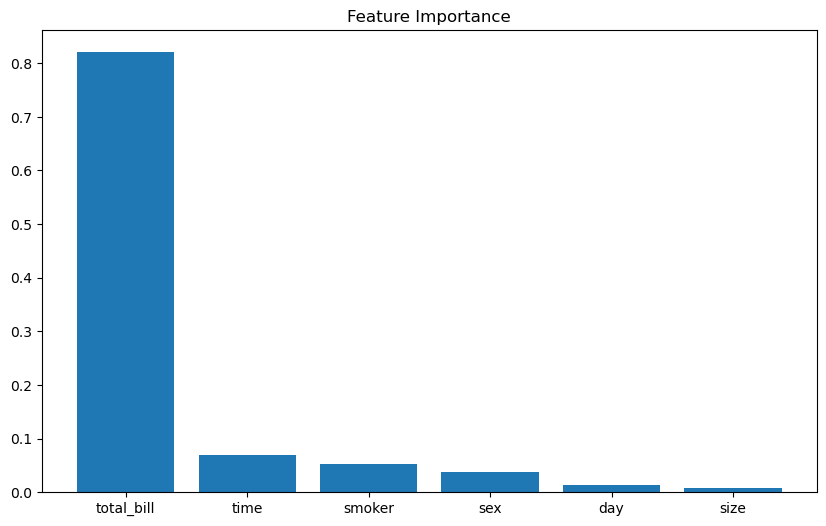

In [359]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for the Random Forest model
feature_importances = rf_model.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

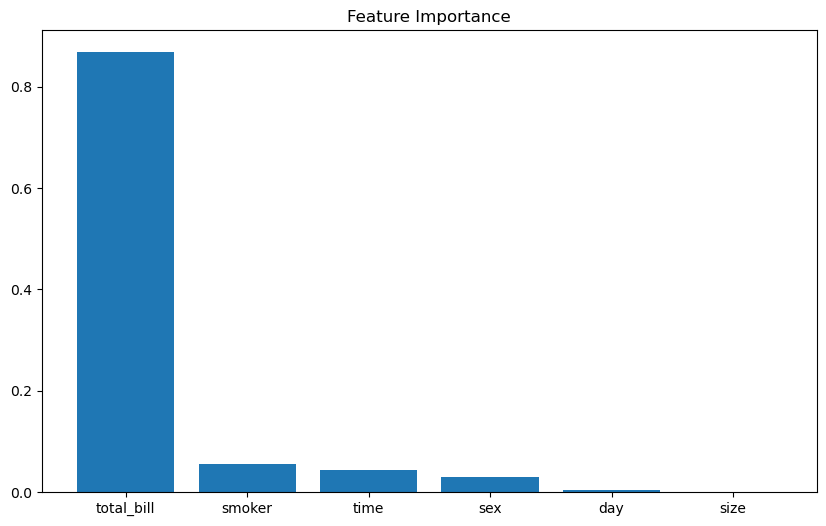

In [360]:
# Feature importance for the Decision tree model
feature_importances = tree_model.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices])
plt.show()

In [362]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(x_train, y_train)
# Display scores in a DataFrame
mi_df = pd.DataFrame({'Feature': x_train.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

      Feature  Mutual Information
0  total_bill            0.302201
2        size            0.117203
1         day            0.055107
3    sex_Male            0.041220
5  time_Lunch            0.036196
4  smoker_Yes            0.000000


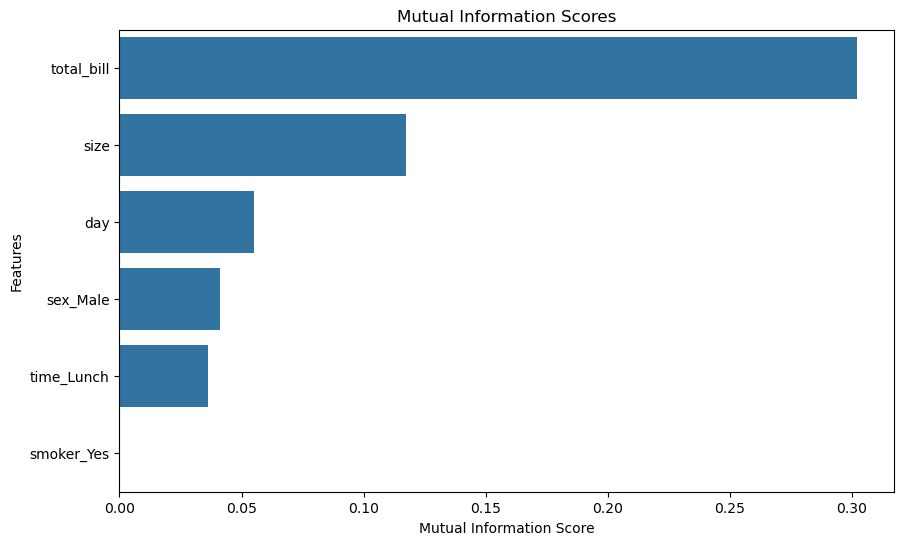

In [363]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Mutual Information", y="Feature", data=mi_df)
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

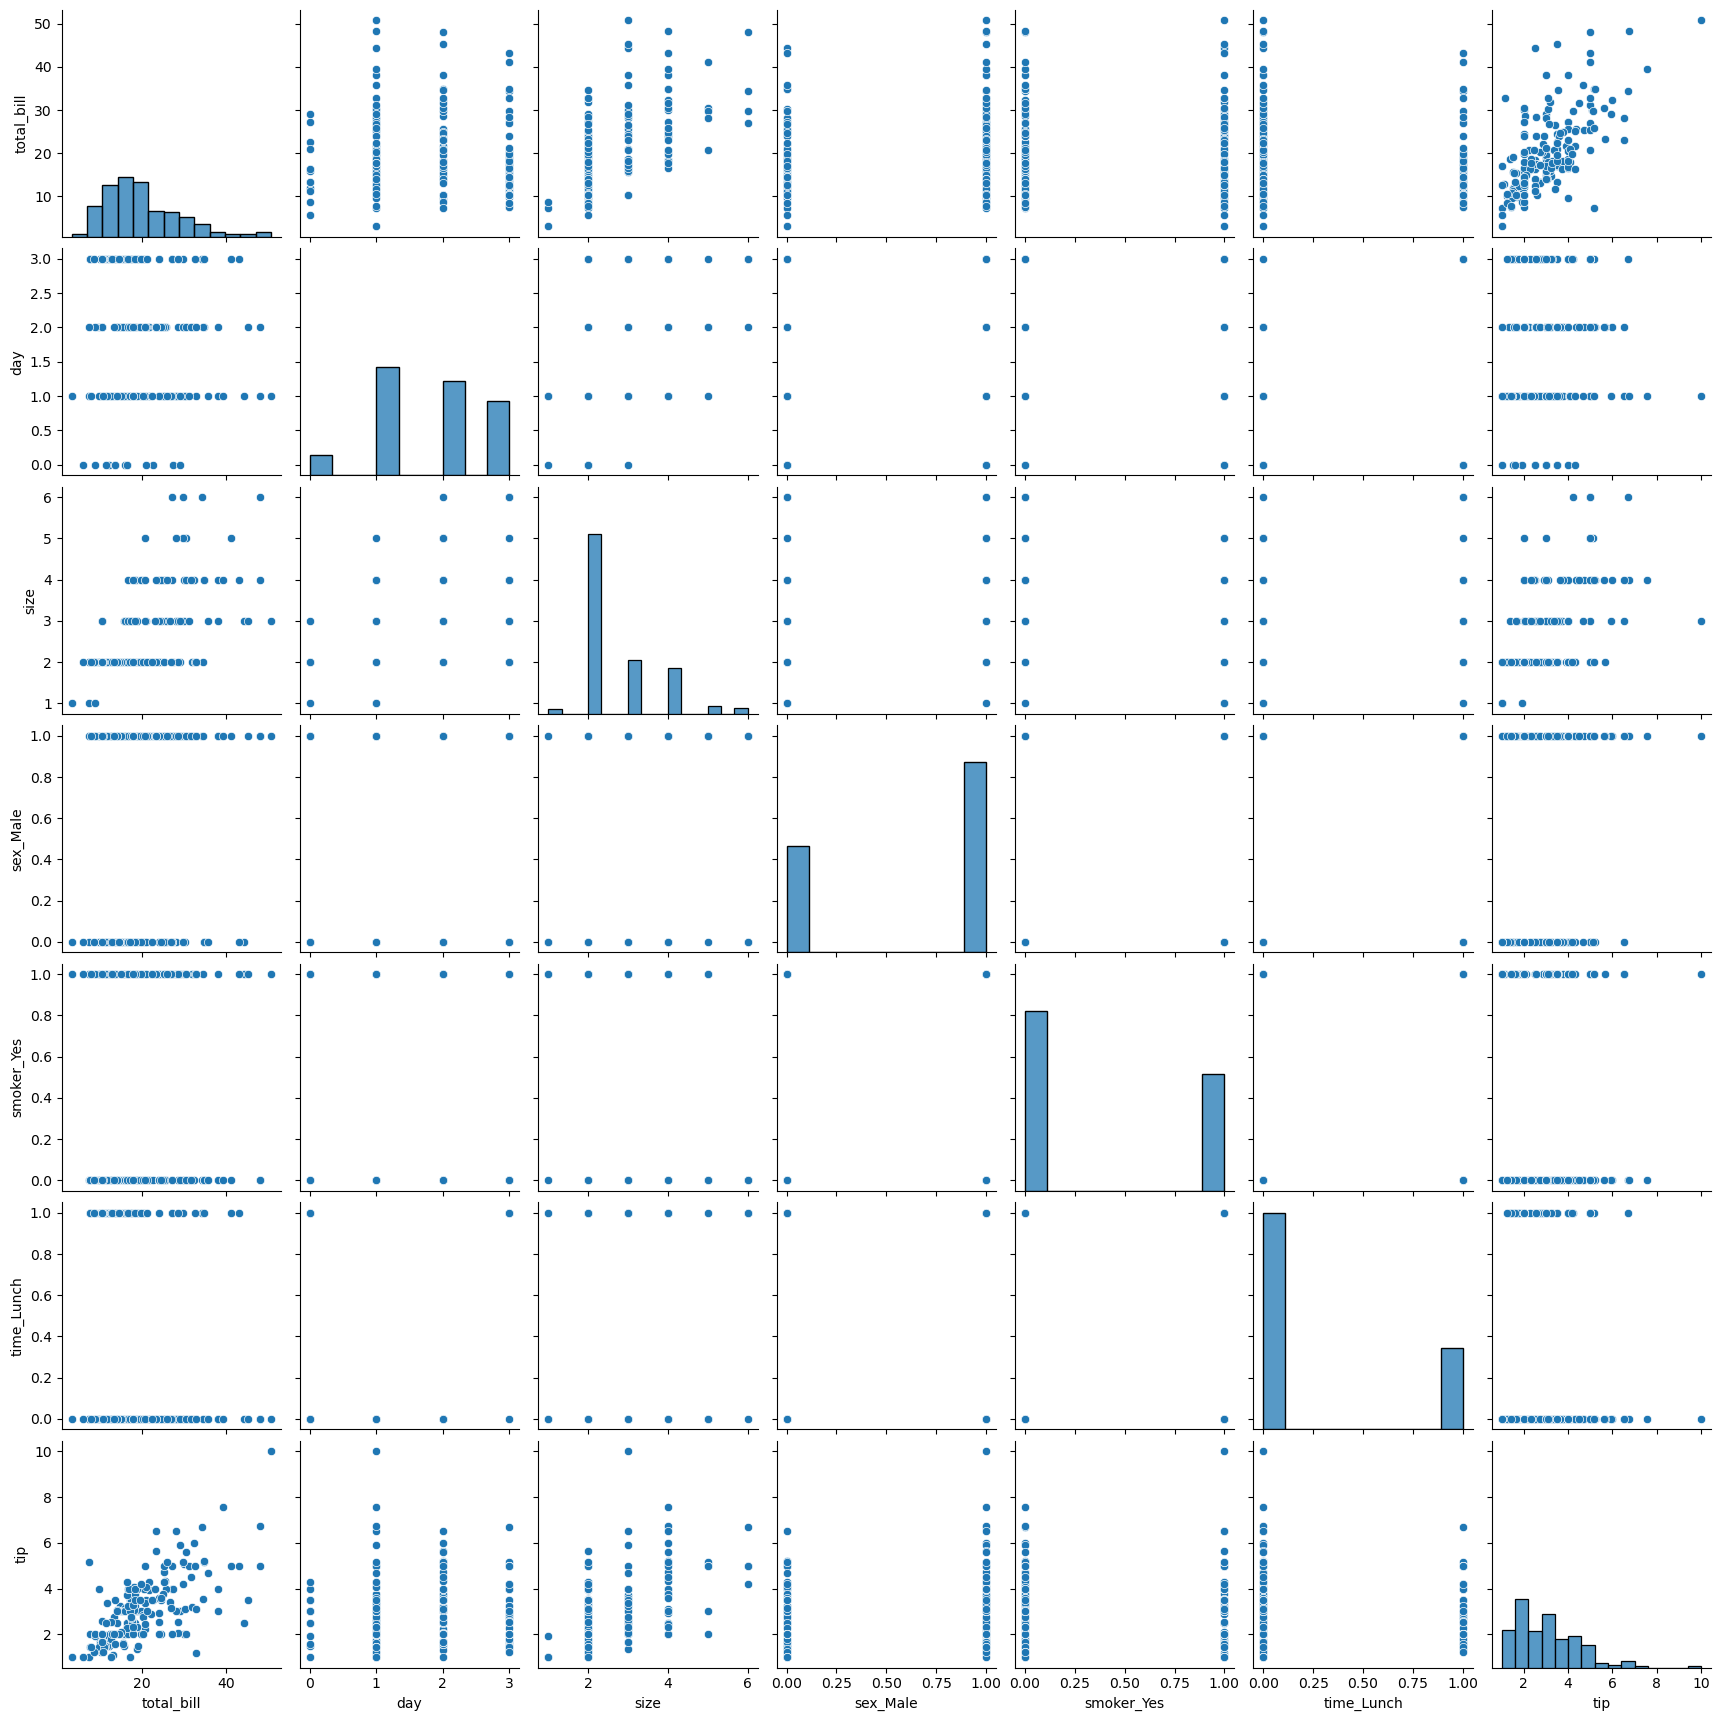

In [466]:
import seaborn as sns
# Concatenate x_train and y_trainfor pair plot
train_data = x_train.copy()
train_data['tip'] = y_train
sns.pairplot(train_data)
plt.show()

target tip vs all the feature columns

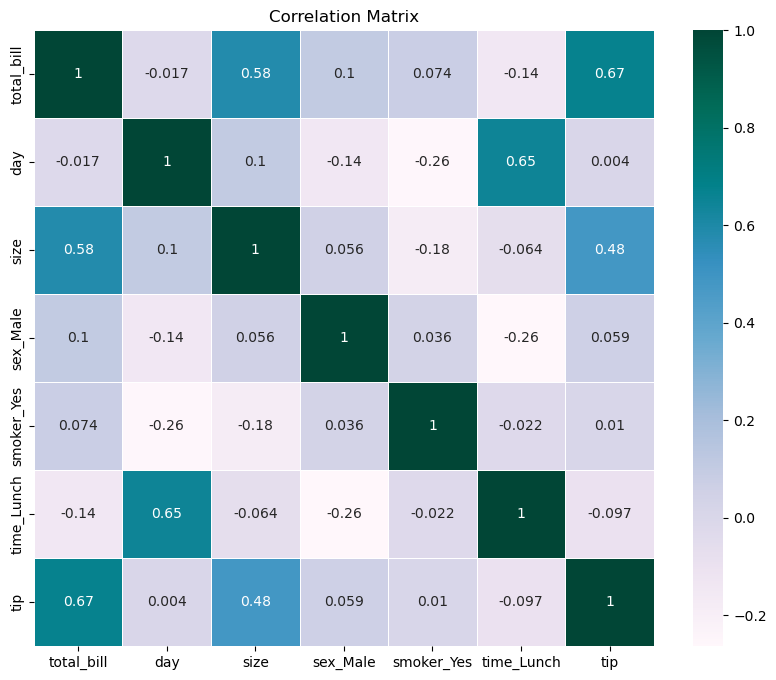

In [455]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Rainbow test

In [371]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Add constant for intercept
x_train_const = sm.add_constant(x_train)

# Fit an OLS model
model = sm.OLS(y_train, x_train_const).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}')

# Interpretation
if rainbow_p_value > 0.05:
    print("No evidence against linearity (p-value > 0.05). The data may follow a linear trend.")
else:
    print("Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.")

Rainbow test statistic: 0.9218499487414652, p-value: 0.6540103310426226
No evidence against linearity (p-value > 0.05). The data may follow a linear trend.


Residual plots

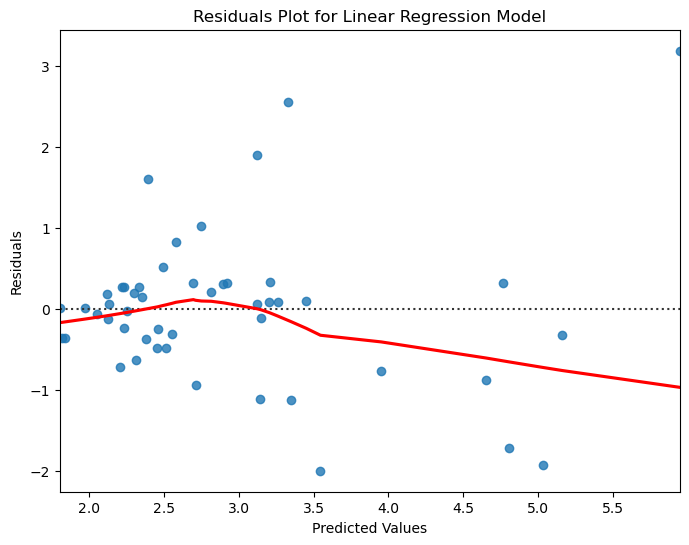

In [373]:
residuals = y_valid - ypred_linear

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=ypred_linear, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

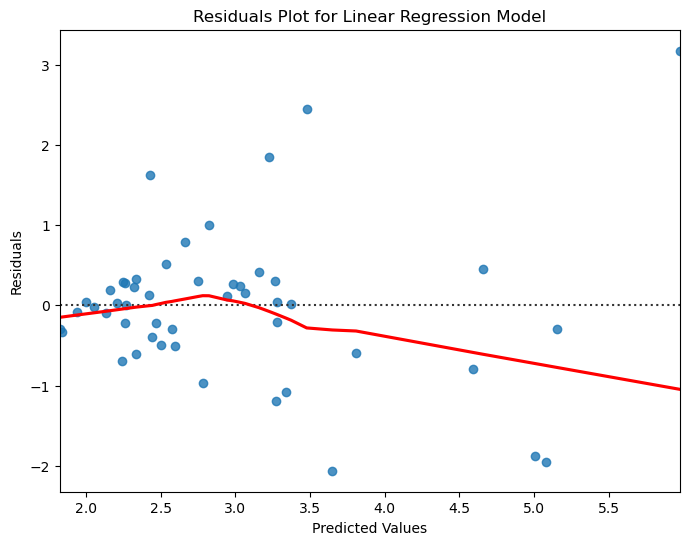

In [374]:
residuals = y_valid - y_pred_lasso
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_lasso, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

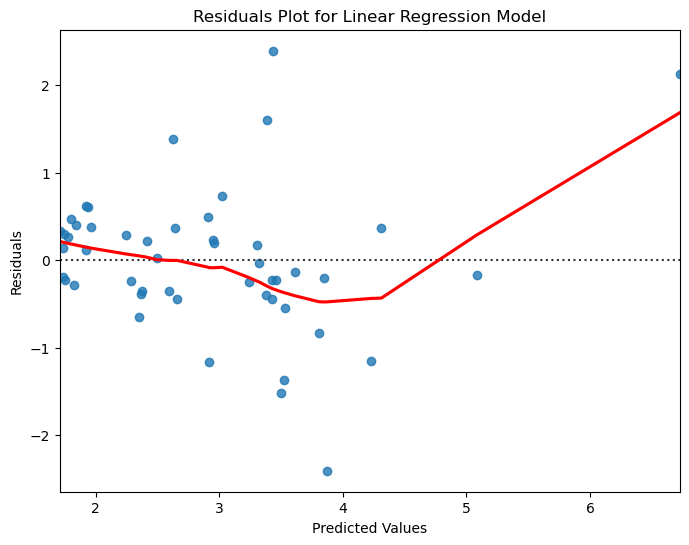

In [375]:
residuals = y_valid - y_pred_rf
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()